# MATH 360 Introduction to Mathematical Modelling

### Modelling Assignment 5: Linear Regression

Discussed with Anthony Mirarchi, Nara Sheen, Umay Gokturk, Tiffany Wu

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
%matplotlib inline



print("packages imported")

packages imported


### Part 1: Construct the Model - Linear Regression

The dataset `concrete_data.csv` contains features that factor in to the compressive strength of concrete:
- the compressive strength in GPa
- the cement component in kg/m$^3$
- the water component as a percentage
- the coarse aggregate component in kg/m$^3$
- the fine aggregate component in kg/m$^3$.

Construct a mathematical model using linear regression for the `concrete_compressive_strength` variable following the **Tasks** below.

Present your work in a Jupyter notebook that includes:
- Problem statement
- Variable and parameter definitions 
- Assumptions and constraints
- Build solutions
- Analysis

Students work individually and submit their work in class.

**State the Problem:**

**Task:** Write a problem statement.

Create a linear regression model to predict for the `concrete_compressive_strength` variable.

**Variables and Parameters:**

**Task:** Complete the table parameters and variables.

Hint: It may be helpful to know that GPa is gigapascals, which is a unit of pressure.  One megapascal is equal to one billion pascals and a Pascal in scientific units is: Pa $ = \frac{\textrm{kg}}{\textrm{m s}}.$


| Description | Symbol | Units | Type|
|-------------|--------|-------|-------|
| Concrete Compressive Strength | $Y$ | GPa | target (dependent) variable |
| Cement Component | $X1$ | kg/m$^3$| feature (independent) variable |
| Water Component | $X2$ | kg/m$^3$ | feature (independent) variable |
| Coarse Aggregate Component | $X3$ | kg/m$^3$| feature (independent) variable |
| Fine Aggregate Component | $X4$ | kg/m$^3$| feature (independent) variable |
| Intercept | $\beta_0$ || parameter |
| coefficient for cement component | $\beta_1$ | | parameter |
| coefficient for water component | $\beta_2$ | | parameter |
| coefficient for coarse aggregate component | $\beta_3$ | | parameter
| coefficient for fine aggregate component | $\beta_4$ | | parameter


**Assumptions and Constraints:**

**Task:** State assumptions and constraints. 

- The data satisfies the assumptions needed to perform linear regression (i.e. the the 4 assumptions on the error term $\epsilon$).
- Trends in the historical data are expected to continue into the future.
- Proportion or training and testing sets will follow about 70-30

**Build Solutions:**

**Task:** Construct and run the linear regression model where `concrete_compressive_strength` is the output and `cement`,`water`, `course_aggregate`, and `fine_aggregate` are the inputs.

A linear regression model is as follows:

$$Y = \beta_0 + \beta_1 X1 + \beta_2 X2 + \beta_3 X3 + \beta_4 X4$$

In [2]:
df = pd.read_csv("concrete_data.csv")
df = pd.DataFrame(df)
df["int"] = 1
df.head()

,cement,water,coarse_aggregate,fine_aggregate,concrete_compressive_strength,int
0,540.0,0.923441,1040.0,676.0,0.006398,1
1,540.0,0.923441,1055.0,676.0,0.003830,1
2,332.5,0.985472,932.0,594.0,0.001622,1
3,332.5,0.985472,932.0,594.0,0.001685,1
4,198.6,0.954279,978.4,825.5,0.001962,1


In [3]:
df.tail()

,cement,water,coarse_aggregate,fine_aggregate,concrete_compressive_strength,int
1025,276.4,0.942161,870.1,768.3,0.001961,1
1026,322.2,0.958022,817.9,813.4,0.000972,1
1027,148.5,0.954940,892.4,780.0,0.000562,1
1028,159.1,0.938073,989.6,788.9,0.001074,1
1029,260.9,0.962233,864.5,761.5,0.001050,1


We will take the first 700 rows as a training set and the rest 300 rows as a testing set for our regression model.

In [4]:
# we take first 700 rows for training and the rest for testing

x = df[["int","cement", "water", "coarse_aggregate", "fine_aggregate"]].iloc[0:700]
y = df["concrete_compressive_strength"].iloc[0:700]
x_test = df[["cement", "water", "coarse_aggregate", "fine_aggregate"]].iloc[700:-1]
y_test = df["concrete_compressive_strength"].iloc[700:-1]


Now, we proceed to calculate in hands using the formula learned in class.

In [5]:
#make transpose of X
x_transp = x.transpose()

#inverse (x'x)^(-1)
x_mat_inv = np.linalg.inv(np.matmul(np.array(x_transp),np.array(x)))

#calculate beta's: x'y
beta_l = np.matmul(np.array(x_transp),np.array(y))

#calculate (x'x)^(-1) x'y
beta = np.matmul(x_mat_inv,beta_l)

print('intercept', beta[0])
print('beta_cement', beta[1])
print('beta_water', beta[2])
print('beta_coarse', beta[3])
print('beta_fine', beta[4])

intercept 0.039915666559721466
beta_cement 3.407575311615413e-06
beta_water -0.031065227834905895
beta_coarse -5.2857663387629505e-06
beta_fine -6.163868497376151e-06


This indicates that we have a linear regression eqation of $$Y = (0.03991) + (3.4076e^{-6}) X1 + (-0.03106) X2 + (-5.286e^{-6}) X3 + (-6.164e^{-6}) X4$$

Now, we predict using the `statsmodels.api`. 

In [6]:
X = sm.add_constant(x)
X_test = sm.add_constant(x_test)

reg = sm.OLS(y, X).fit()
summary_table = reg.summary()
print(summary_table)

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.377
Model:                                       OLS   Adj. R-squared:                  0.374
Method:                            Least Squares   F-statistic:                     105.3
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):           4.32e-70
Time:                                   19:36:32   Log-Likelihood:                 3739.4
No. Observations:                            700   AIC:                            -7469.
Df Residuals:                                695   BIC:                            -7446.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

This model gives $R^2$ as 0.377 and $R^2_{adj}$ as 0.374.

**Analyze and Assess:**

**Task:** Determine if the linear regression assumptions are satisfied for the model in the previous task. 

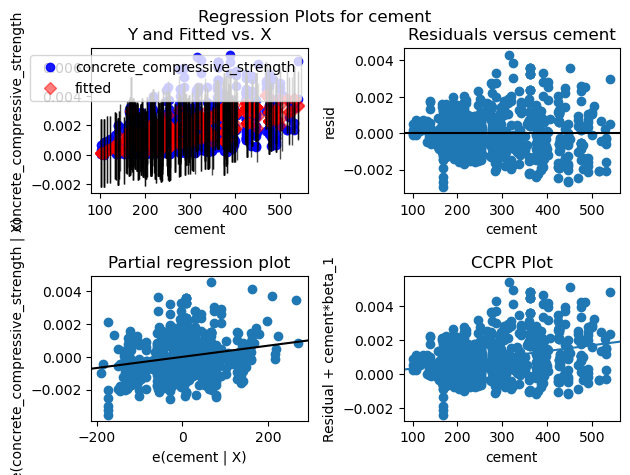

In [7]:
sm.graphics.plot_regress_exog(reg,"cement")
plt.show()

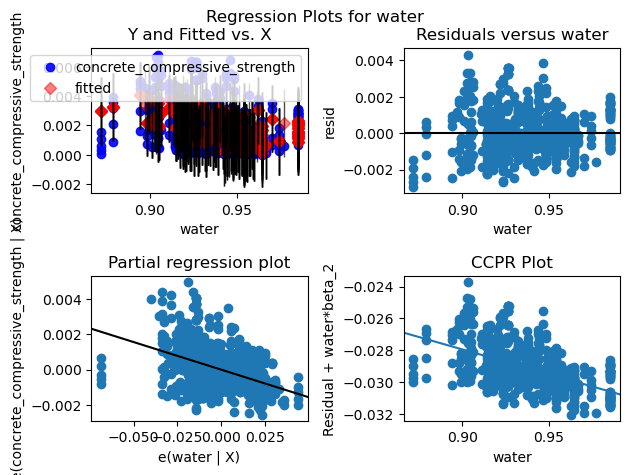

In [8]:
sm.graphics.plot_regress_exog(reg,"water")
plt.show()

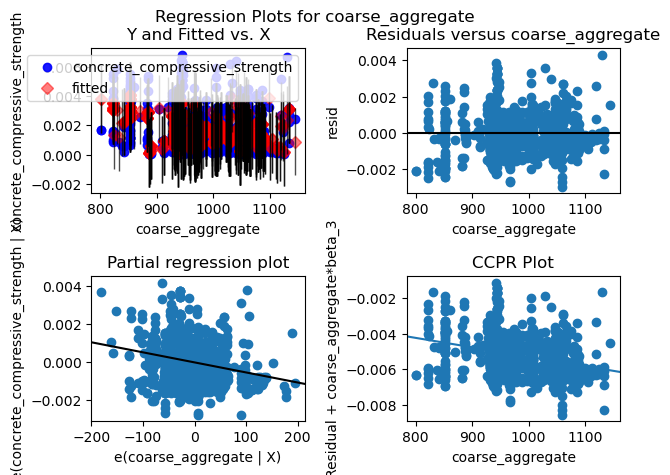

In [9]:
sm.graphics.plot_regress_exog(reg,"coarse_aggregate")
plt.show()

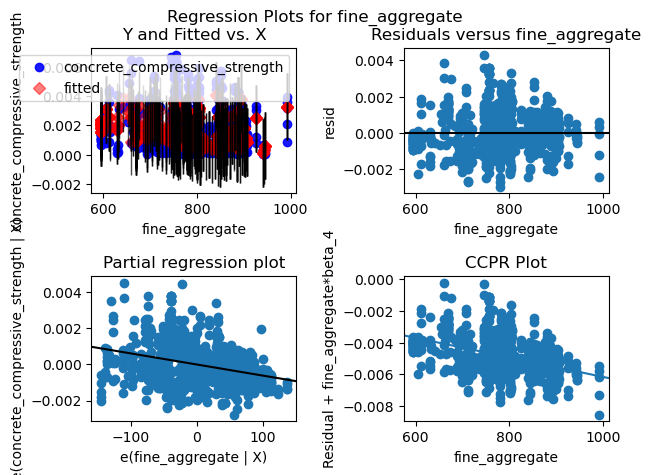

In [10]:
sm.graphics.plot_regress_exog(reg,"fine_aggregate")
plt.show()

It seems that none of the residuals plot for each variable has a clear pattern to it. Hence, it is likely that the average errors are 0. However, it needs improvements, looking at partial regression plot because they do not show a clear linear relationships. 

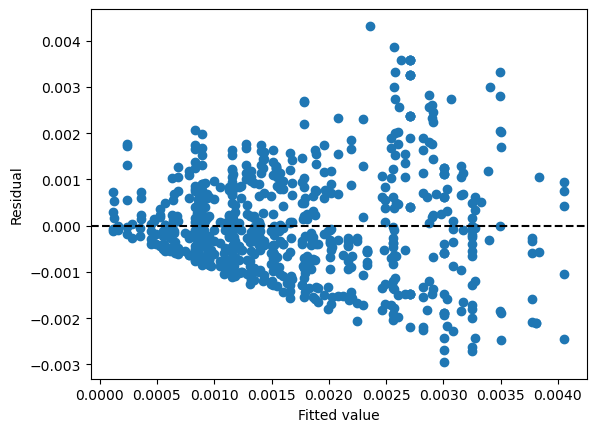

In [11]:
fitted_y = reg.fittedvalues

residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

Additionally, looking at the residual fitted plot, it can be controversial but it somewhat has a vague pattern around the horizontal axis at 0. Thus, we can say that the assumption that the variance is constant. This implies that we have a violation in more than one assumptions.

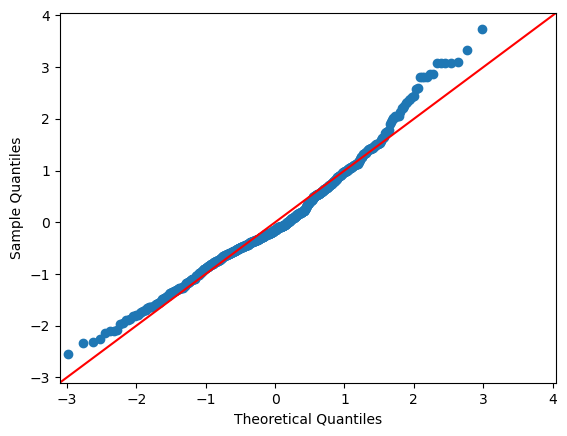

In [12]:
sm.qqplot(residuals, fit=True, line="45")
plt.show()

In this QQ plot, we see a clear $y = x$ relationship. This indicates that we don't have a violation in this aspect. Thus, we know that errors are normally distributed. 

0.0006751173852745907


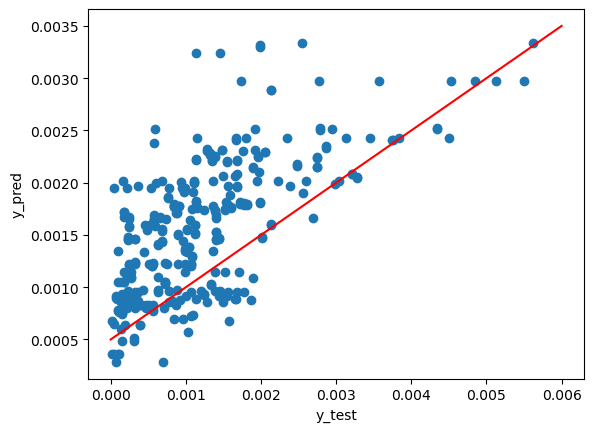

In [15]:
y_pred = reg.predict(X_test)
error = np.abs(y_pred - y_test)
print(np.mean(error))

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.plot(np.linspace(0,0.006,100),np.linspace(0.0005,0.0035,100), color = "red")
plt.show()

Assumptions that the average value is 0 and the errors are normally distributed were not violated, however, an assumption that the variance is constant was. Along with that, we had a very low values for $R^2$ and $R^2_{adj}$ which means we do not have a very good model. This can be proved by the plot above, as we do not have a trend in this scatter plot of `y_pred` vs. `y_test`. 

**Task:**  The following are possible transformations that could be made to the `concrete_data.csv` inputs and output. These transformations can be used individually or in combination. 
1. `np.exp(water)`
2. `concrete_compressive_strength**2`
3. `np.sqrt(concrete_compressive_strength)`


Determine, with justification, the *best* linear regression model to use for the `concrete_data.csv`.  

Due to several changes, we can have:
1. $X2 => e^{X2}$
2. $Y => Y^2$
3. $Y => \sqrt Y$

Since we can have one or more transformations at a time, we can expect 6 different combinations.
Thus we now have:
1. $Y = \beta_0 + \beta_1 X1 + \beta_2 e^{X2} + \beta_3 X3 + \beta_4 X4$
2. $Y^2 = \beta_0 + \beta_1 X1 + \beta_2 X2 + \beta_3 X3 + \beta_4 X4$
3. $\sqrt Y = \beta_0 + \beta_1 X1 + \beta_2 X2 + \beta_3 X3 + \beta_4 X4$
4. $Y^2 = \beta_0 + \beta_1 X1 + \beta_2 e^{X2} + \beta_3 X3 + \beta_4 X4$
5. $\sqrt Y = \beta_0 + \beta_1 X1 + \beta_2 e^{X2} + \beta_3 X3 + \beta_4 X4$
6. $Y = \beta_0 + \beta_1 X1 + \beta_2 X2 + \beta_3 X3 + \beta_4 X4$

The 6th transformation is the combination of `concrete_compressive_strength**2` and `np.sqrt(concrete_compressive_strength)`, which in total cancel out and epitomizes a simple linear regression. Thus, we will look into 5 cases. 

In [16]:
# the first case
df["X2"] = np.exp(df["water"])
df

X = df[["cement", "X2", "coarse_aggregate", "fine_aggregate"]]
Y = df["concrete_compressive_strength"]

X = sm.add_constant(X)

#run regression
reg_1 = sm.OLS(Y, X).fit()

summary_table = reg_1.summary()
print(summary_table)

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.404
Model:                                       OLS   Adj. R-squared:                  0.401
Method:                            Least Squares   F-statistic:                     173.5
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):          1.66e-113
Time:                                   19:37:07   Log-Likelihood:                 5606.0
No. Observations:                           1030   AIC:                        -1.120e+04
Df Residuals:                               1025   BIC:                        -1.118e+04
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

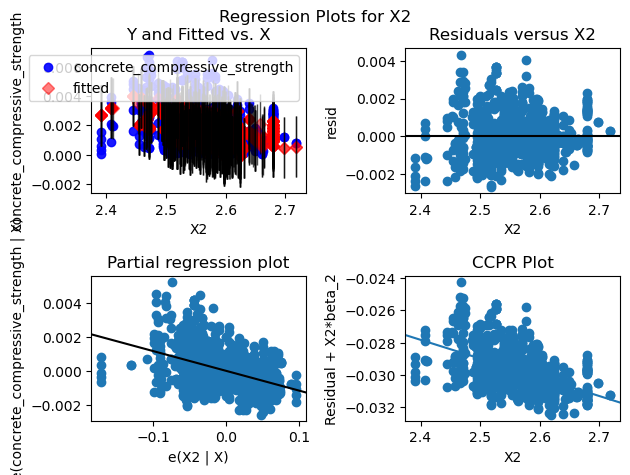

In [17]:
sm.graphics.plot_regress_exog(reg_1,"X2")
plt.show()

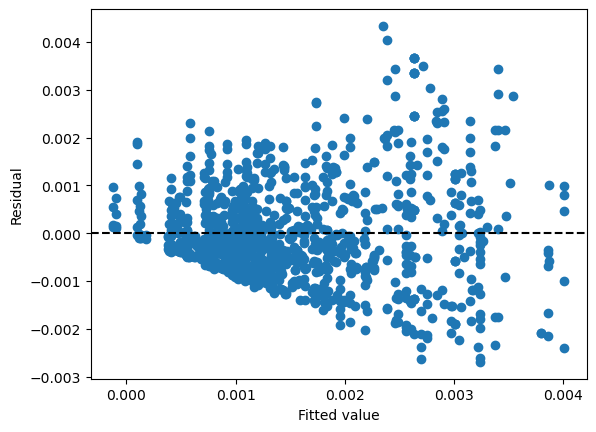

In [18]:
fitted_y = reg_1.fittedvalues

residuals = reg_1.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

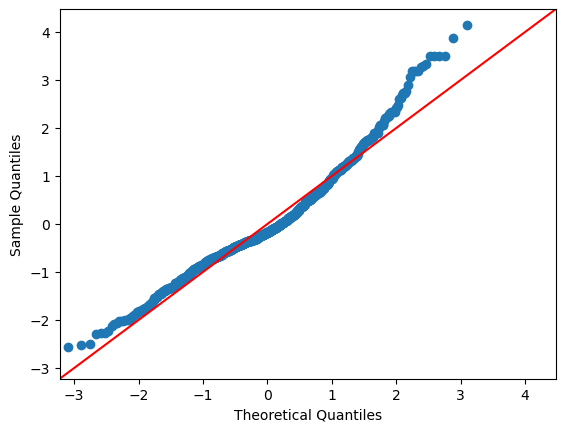

In [19]:
sm.qqplot(residuals, fit=True, line="45")
plt.show()

In this transformation, the $R^2$ and $R^2_{adj}$ are fairly larger than our orginal linear regression model, at 0.404 and 0.401 respectively. Also, the violations of assumptions are similar to the original model. 

In [20]:
# the second case
X = df[["cement", "water", "coarse_aggregate", "fine_aggregate"]]
Y = df["concrete_compressive_strength"]**2

X = sm.add_constant(X)

#run regression
reg_2 = sm.OLS(Y, X).fit()

summary_table = reg_2.summary()
print(summary_table)

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.313
Model:                                       OLS   Adj. R-squared:                  0.310
Method:                            Least Squares   F-statistic:                     116.7
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):           4.58e-82
Time:                                   19:37:10   Log-Likelihood:                 10929.
No. Observations:                           1030   AIC:                        -2.185e+04
Df Residuals:                               1025   BIC:                        -2.182e+04
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

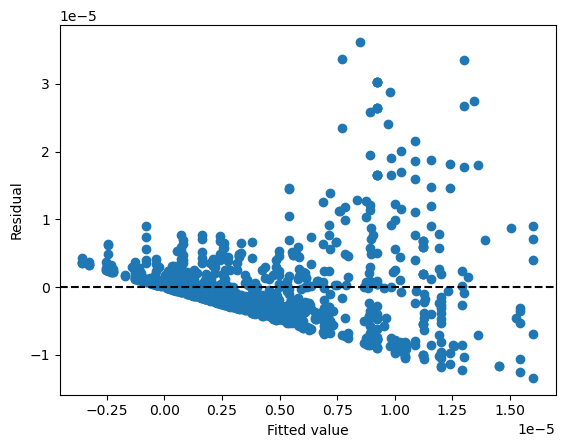

In [21]:
fitted_y = reg_2.fittedvalues

residuals = reg_2.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

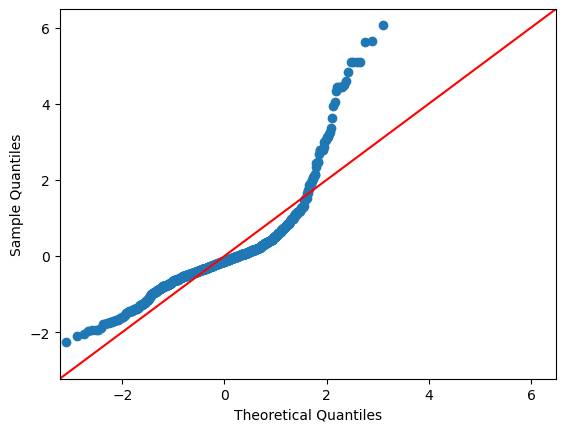

In [22]:
sm.qqplot(residuals, fit=True, line="45")
plt.show()

We already can see that this model is worse than our original linear regression due to lower $R^2$ and $R^2_{adj}$ values of 0.313 and 0.310, respectively. Additionally, violations on assumptions would also follow the original regression, as well.

In [23]:
# the third case
X = df[["cement", "water", "coarse_aggregate", "fine_aggregate"]]
Y = np.sqrt(df["concrete_compressive_strength"])

X = sm.add_constant(X)

#run regression
reg_3 = sm.OLS(Y, X).fit()

summary_table = reg_3.summary()
print(summary_table)

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.418
Model:                                       OLS   Adj. R-squared:                  0.415
Method:                            Least Squares   F-statistic:                     183.7
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):          1.07e-118
Time:                                   19:37:11   Log-Likelihood:                 3032.1
No. Observations:                           1030   AIC:                            -6054.
Df Residuals:                               1025   BIC:                            -6030.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

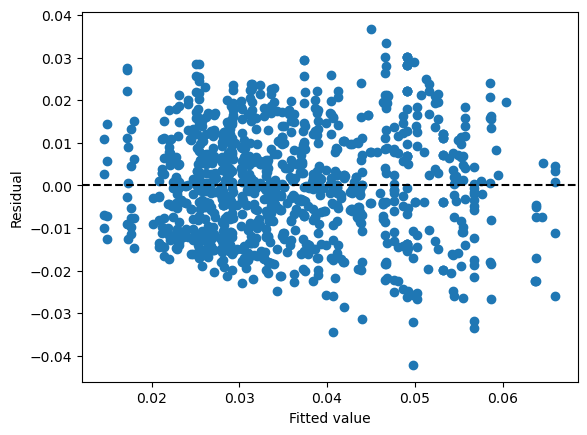

In [24]:
fitted_y = reg_3.fittedvalues

residuals = reg_3.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

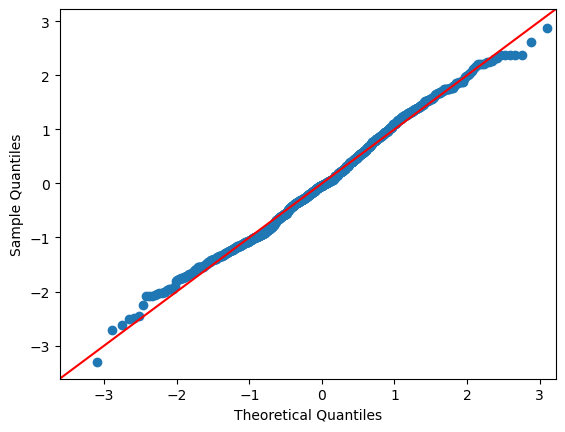

In [25]:
sm.qqplot(residuals, fit=True, line="45")
plt.show()

In [26]:
# the fourth case
df["X2"] = np.exp(df["water"])
X = df[["cement", "X2", "coarse_aggregate", "fine_aggregate"]]
Y = df["concrete_compressive_strength"]**2

X = sm.add_constant(X)

#run regression
reg_4 = sm.OLS(Y, X).fit()

summary_table = reg_4.summary()
print(summary_table)

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.313
Model:                                       OLS   Adj. R-squared:                  0.311
Method:                            Least Squares   F-statistic:                     116.9
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):           3.85e-82
Time:                                   19:37:12   Log-Likelihood:                 10930.
No. Observations:                           1030   AIC:                        -2.185e+04
Df Residuals:                               1025   BIC:                        -2.182e+04
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

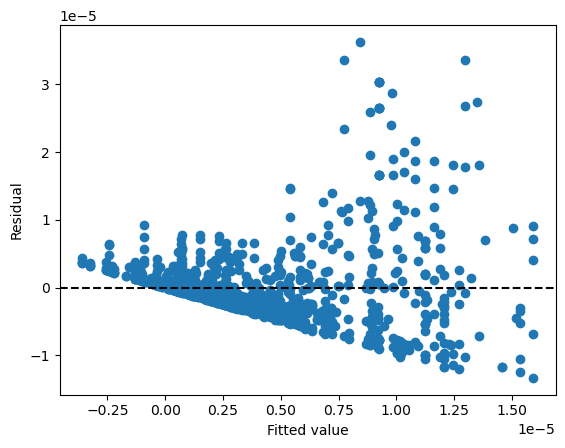

In [27]:
fitted_y = reg_4.fittedvalues

residuals = reg_4.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

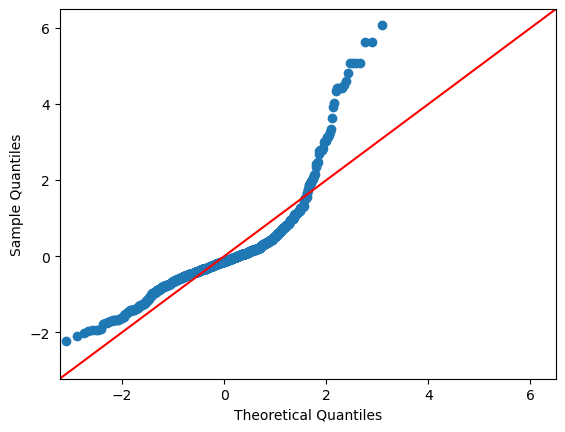

In [28]:
sm.qqplot(residuals, fit=True, line="45")
plt.show()

In [29]:
# the fifth case
df["X2"] = np.exp(df["water"])
X = df[["cement", "X2", "coarse_aggregate", "fine_aggregate"]]
Y = np.sqrt(df["concrete_compressive_strength"])

X = sm.add_constant(X)

#run regression
reg_5 = sm.OLS(Y, X).fit()

summary_table = reg_5.summary()
print(summary_table)

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.417
Model:                                       OLS   Adj. R-squared:                  0.415
Method:                            Least Squares   F-statistic:                     183.5
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):          1.32e-118
Time:                                   19:37:13   Log-Likelihood:                 3031.9
No. Observations:                           1030   AIC:                            -6054.
Df Residuals:                               1025   BIC:                            -6029.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

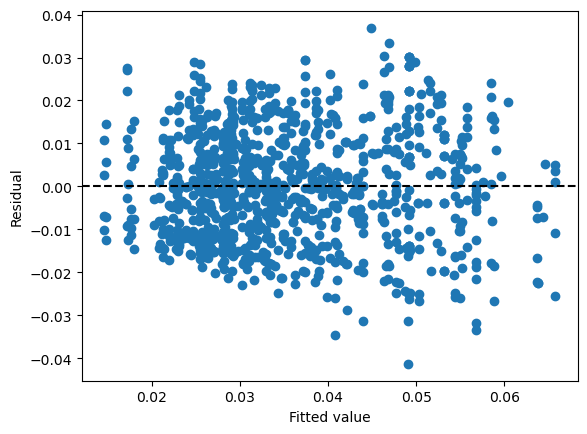

In [30]:
fitted_y = reg_5.fittedvalues

residuals = reg_5.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

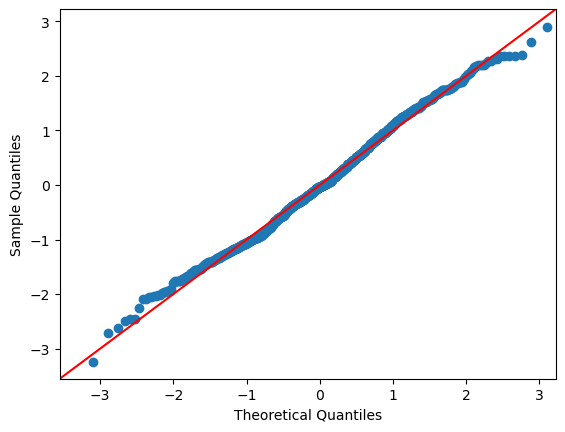

In [31]:
sm.qqplot(residuals, fit=True, line="45")
plt.show()

We can choose the fifth case, where we have a sqaure root on the target variable. The fifth case doesn't give us the highest $R^2$ and $R^2_{adj}$ values, however, it is quite high among all the cases and its QQplot and residuals implies we have the least violations of assumptions. We see that we have a random scatter plot near the horizontal axis at 0. This implies that variance is constant. Furthermore, the QQplot align with the $y = x$ line and this means that error are normally distributed. Additionally, referring to the first case of combination in transformations, we got a random scatter in covariate residual. Thus, the average value of the error is 0. 

With all the assumptions satisfied, as well as high $R^2$ and $R^2_{adj}$ values, $Y = \sqrt Y$ and $X2 = e^{X2}$ is the best combination in transformations. 

**Task:** Using your chosen model from the previous task, show how concrete compressive strength changes under various conditions.  Be creative!

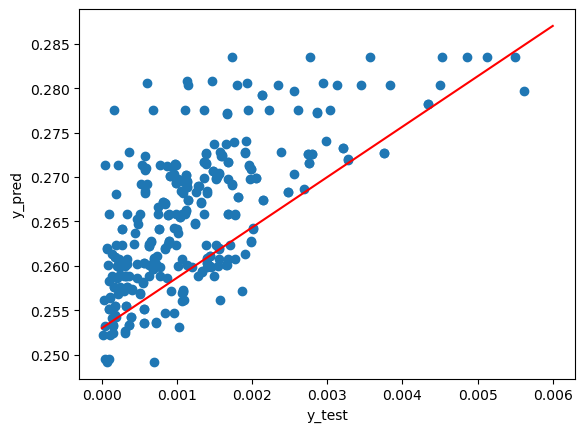

In [39]:
y_pred = reg_5.predict(X_test)
error = np.abs(y_pred - y_test)

Y = 0.4940 + (5.574e-5)*X["cement"] + (-0.1412)*X["X2"] + (-5.753e-5)*X["coarse_aggregate"] + (-7.163e-5)*X["fine_aggregate"]

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.plot(np.linspace(0,0.006,100),np.linspace(0.253,0.287,100), color = "red")
plt.show()

We see that we now have a linear regression model equation of :
$$Y = 0.4940 + (5.574e^{-5})X1 + (-0.1412)X2 + (-5.753e^{-5})X3 + (-7.163e^{-5})X4$$

Comparing the coefficients and intercepts from this model and the previous model. We see a ratio of 10 times difference. As seen above, we have $R^2$ and $R^2_{adj}$ 0.417 and 0.415, respectively. This values are not very good numbers, thus, this indicates that we still have a bad model. 

### Part 2: Collaborate, Refine, and Simulate the Model

After submitting your work in Part 1 in class, work in groups and compare your results. Collaborate, refine, and simulate your models.

Present your work in a Jupyter notebook including all parts in Part $1$ along with:
- Numerical solutions
- Visualizations of solutions
- Analysis and discussion of the results.

In addition, include a clearly labelled section at the end of your Jupyter notebook, where you discuss the improvements you have made and/or what steps have been taken to refine the model.

Students work collaboratively but submit their own final Jupyter notebook individually. Include names of all students with whom you collaborated in Part $2$.

#### Part 2 - Reflection 
This reflection should have two parts: 

1) Explain in a list of bullet points the changes you have made to your model in the version you are submitting and why you chose to make those changes. 

2) In a paragraph or two reflect on the following prompts:
    - What part of the six modelling steps was the most challenging for you?
    - What helped you to identify any mistakes/misconceptions in your original model?
    - Do you think these techniques would be helpful for identifying mistakes/misconceptions in future assignments? Why or why not? 

1. 
* I originally made, when going through transformations, the inverse of what they were shown in the question. For example, if we had *np.sqrt(concrete_compressive_strength)*, then I would make it *(concrete_compressive_strength)$^2$*, so that it could be canceled out and follow a linear regression relationship.
* When examining the residual plot for the original linear regression model, I first thought that it did not have a clear pattern, hence, figured that the assumption was not violated and that variance is constant. However, comparing with other residual plots, I figured it somewhat had some patterns. This led to a conception that variance was not constant and was violated. 
* I only put down three cases for transformation because I miscomprehended the question. 
* Due to time limitations, I was only able to create regression models for each case. However, I now extended my cases to 6 cases with each combination, with one incorporating square root and square, hence, it displays a simple linear regression. Additionally, I have compared 5 cases by $R^2$ and $R^2_{adj}$, as well as the residual plots, covariate residual plots, QQplots, etc. The reason why I not only compared the $R^2$ and $R^2_{adj}$ values, but also compared the plots, is so that I can compare whether each and one of the case violated certain assumption. At last, I came to a conclusion that the fifth case, *np.sqrt(concrete_compressive_strength* and *np.exp(water)* is the best combination because of their adequately high $R^2$ and $R^2_{adj}$ values and no assumptions were violated. 

2.
Personally, analyzing and assessing part was the most difficult. Building solution is quite straight forward, where we can just implement a simple linear regression with our data set. We can always use the tool that is already provided for us. For example, we have `statsmodel` package to help us create and fit a linear regression model. However, when analyzing and assessing a linear regression model, we must check the status of violation in any assumptions. When examining different types of plots, such as QQplot, covariate residual, residual plots, etc, we have to be able to point any patterns shown in any of the plots. As pattern-seeking is something that one may be lacking, it takes a great effort. Being exposed to many graph to recognize certain pattern helped me to identify any mistakes/misconceptions in my original model. 